In [48]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('adult.data.csv')

# 1. How many people of each race are represented in this dataset?
race_counts = df['race'].value_counts()

# 2. What is the average age of men?
average_age_men = df[df['sex'] == 'Male']['age'].mean()

# 3. What is the percentage of people who have a Bachelor's degree?
percentage_bachelors = (df['education'] == 'Bachelors').mean() * 100

# 4. What percentage of people with advanced education make more than 50K?
higher_education = df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])
higher_education_rich = (df[higher_education]['salary'] == '>50K').mean() * 100

# 5. What percentage of people without advanced education make more than 50K?
lower_education_rich = (df[~higher_education]['salary'] == '>50K').mean() * 100

# 6. What is the minimum number of hours a person works per week?
min_work_hours = df['hours-per-week'].min()

# 7. What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?
num_min_workers = df[df['hours-per-week'] == min_work_hours]
rich_percentage = (num_min_workers['salary'] == '>50K').mean() * 100

# 8. What country has the highest percentage of people that earn >50K and what is that percentage?
country_salary = df[df['salary'] == '>50K']['native-country'].value_counts() / df['native-country'].value_counts() * 100
highest_earning_country = country_salary.idxmax()
highest_earning_country_percentage = country_salary.max()

# 9. Identify the most popular occupation for those who earn >50K in India.
top_IN_occupation = df[(df['native-country'] == 'India') & (df['salary'] == '>50K')]['occupation'].value_counts().idxmax()

# Print the results
print("Race Counts:\n", race_counts)
print("Average Age of Men:", average_age_men)
print("Percentage with Bachelors degrees:", percentage_bachelors)
print("Percentage with advanced education that earn >50K:", higher_education_rich)
print("Percentage without advanced education that earn >50K:", lower_education_rich)
print("Minimum number of hours a person works per week:", min_work_hours)
print("Percentage of rich among those who work fewest hours:", rich_percentage)
print("Country with highest percentage of people that earn >50K:", highest_earning_country)
print("Highest percentage of people that earn >50K in country:", highest_earning_country_percentage)
print("Top occupations in India for those who earn >50K:", top_IN_occupation)


Race Counts:
 race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64
Average Age of Men: 39.43354749885268
Percentage with Bachelors degrees: 16.44605509658794
Percentage with advanced education that earn >50K: 46.535843011613935
Percentage without advanced education that earn >50K: 17.3713601914639
Minimum number of hours a person works per week: 1
Percentage of rich among those who work fewest hours: 10.0
Country with highest percentage of people that earn >50K: Iran
Highest percentage of people that earn >50K in country: 41.86046511627907
Top occupations in India for those who earn >50K: Prof-specialty


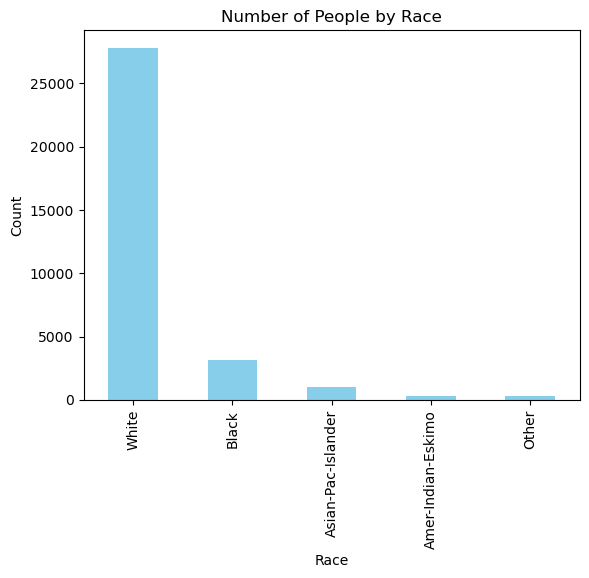

In [49]:
import seaborn as sns

# Number of people of each race
race_counts = df['race'].value_counts()

# Plotting race representation
race_counts.plot(kind='bar', color='skyblue')
plt.title('Number of People by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()


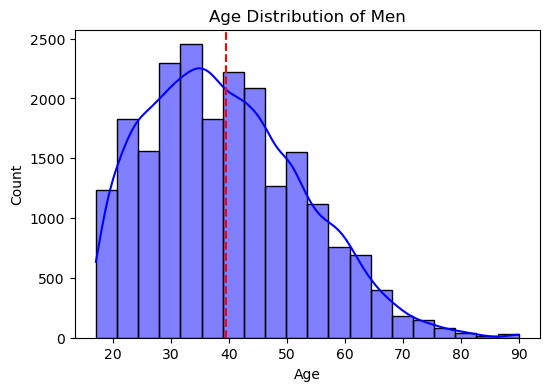

In [50]:
# Average age of men
avg_age_men = df[df['sex'] == 'Male']['age'].mean()

# Plotting average age of men
plt.figure(figsize=(6, 4))
sns.histplot(df[df['sex'] == 'Male']['age'], bins=20, kde=True, color='blue')
plt.axvline(avg_age_men, color='red', linestyle='--')
plt.title('Age Distribution of Men')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_1172\1583015551.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Education Level', y='Percentage Making >50K', data=education_income, palette='viridis')


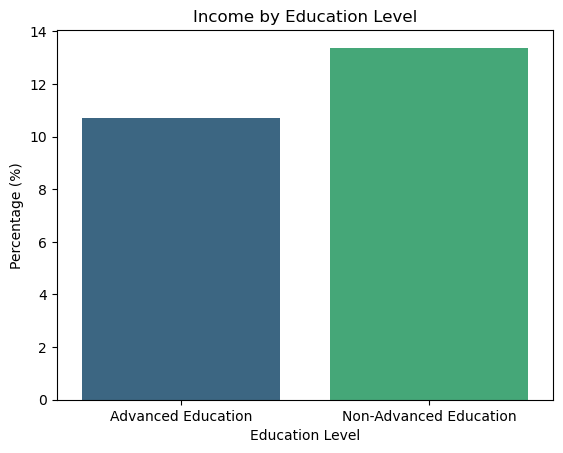

In [51]:
# Percentage of people with a Bachelor's degree
percentage_bachelors = (df['education'] == 'Bachelors').mean() * 100

# Advanced education and income
advanced_education = df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])
high_income = df['salary'] == '>50K'

# Percentage of people with advanced education making >50K
percentage_advanced_high_income = (advanced_education & high_income).mean() * 100

# Percentage of people without advanced education making >50K
percentage_non_advanced_high_income = (~advanced_education & high_income).mean() * 100

# Plotting education level and income
education_income = pd.DataFrame({
    'Education Level': ['Advanced Education', 'Non-Advanced Education'],
    'Percentage Making >50K': [percentage_advanced_high_income, percentage_non_advanced_high_income]
})

sns.barplot(x='Education Level', y='Percentage Making >50K', data=education_income, palette='viridis')
plt.title('Income by Education Level')
plt.ylabel('Percentage (%)')
plt.show()


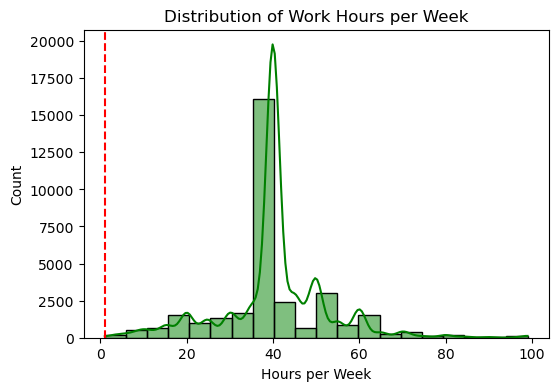

In [52]:
# Minimum number of hours a person works per week
min_hours_per_week = df['hours-per-week'].min()

# Percentage of people working minimum hours making >50K
min_hours_high_income = (df['hours-per-week'] == min_hours_per_week) & high_income
percentage_min_hours_high_income = min_hours_high_income.mean() * 100

# Plotting work hours and income
plt.figure(figsize=(6, 4))
sns.histplot(df['hours-per-week'], bins=20, kde=True, color='green')
plt.axvline(min_hours_per_week, color='red', linestyle='--')
plt.title('Distribution of Work Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Count')
plt.show()



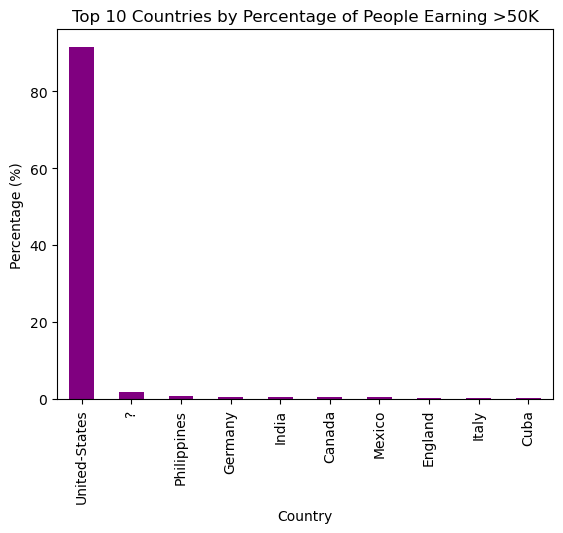

In [53]:
# Country with the highest percentage of people earning >50K
country_high_income = df[df['salary'] == '>50K']['native-country'].value_counts(normalize=True) * 100
highest_country = country_high_income.idxmax()
highest_percentage = country_high_income.max()

# Plotting countries with highest income earners
top_countries = country_high_income.head(10)  # Top 10 countries
top_countries.plot(kind='bar', color='purple')
plt.title('Top 10 Countries by Percentage of People Earning >50K')
plt.xlabel('Country')
plt.ylabel('Percentage (%)')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_1172\533724959.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='occupation', data=india_high_income, order=india_high_income['occupation'].value_counts().index, palette='coolwarm')


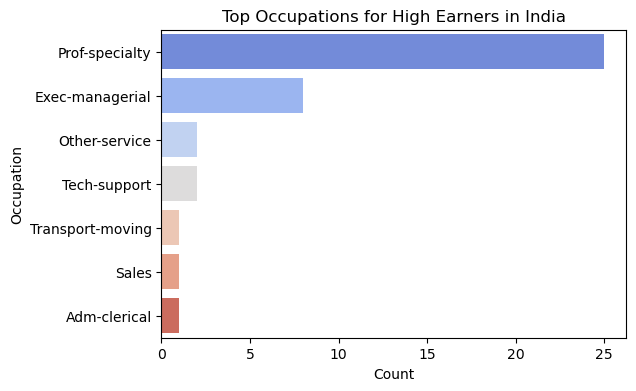

In [54]:
# Most popular occupation for those who earn >50K in India
india_high_income = df[(df['native-country'] == 'India') & high_income]
top_occupation_india = india_high_income['occupation'].value_counts().idxmax()

# Plotting popular occupations in India
plt.figure(figsize=(6, 4))
sns.countplot(y='occupation', data=india_high_income, order=india_high_income['occupation'].value_counts().index, palette='coolwarm')
plt.title('Top Occupations for High Earners in India')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()
